# Breast Cancer Detection uisng Different ML Algorithms

**Getting fimiliar with problem and dataset**

The "WBCD" dataset, also known as the Wisconsin Breast Cancer Diagnostic dataset, is a widely used dataset in machine learning for breast cancer classification. It was originally obtained from the University of Wisconsin Hospitals, Madison and provided by Dr. William H. Wolberg.

This dataset contains measurements of various features extracted from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics of cell nuclei present in the images. The dataset consists of 569 instances, with each instance represented by 30 numeric attributes. These attributes include information such as the radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension of the cell nuclei.

The target variable in the WBCD dataset indicates the diagnosis of the breast mass and has two classes:

"M" - Malignant: indicating the presence of cancerous cells.

"B" - Benign: indicating the absence of cancerous cells.

We are uisng following ML algorithms:

- Logistic Regression
- SVM
- Naive Bayes
- Random Forest
- Gradient Boosting




# Importing Liabraries

In [4]:
# Linear Algebrae
import numpy as np 
# data processing
import pandas as pd 
# data visualization library  
import seaborn as sns 
import matplotlib.pyplot as plt

import time
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

In [5]:
# reading csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [6]:
# checking first five rows of data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# checking data shape
data.shape

(569, 33)

In [9]:
# gettin columns names in data using .columns 
col = data.columns       
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [10]:
# checking null values in each columns
data.isnull().sum(axis = 0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Dropping three columns id, unnamed and diagnosis. diagnosis is our label 
X = data.drop( ['Unnamed: 32','id','diagnosis'],axis = 1 )
y = data.diagnosis 
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


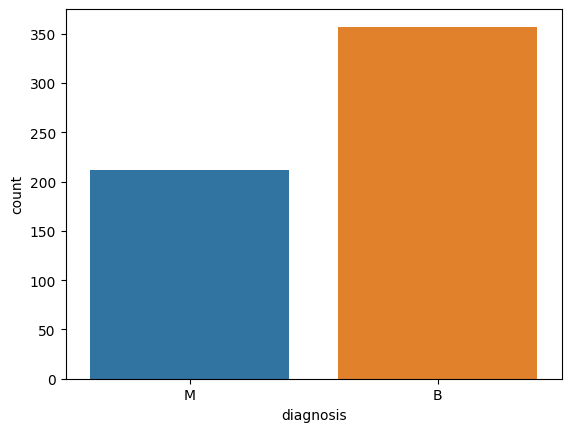

In [12]:
# Plotting label values usig count plot from sns
ax = sns.countplot(x='diagnosis', data=data,) 
Benign, Malignant = y.value_counts()
print('Number of Benign: ', Benign)
print('Number of Malignant : ', Malignant)

In [13]:
# getting basic statics of our X
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualizating the data

**Using sns.violinplot**

A violin plot is a type of data visualization that combines aspects of box plots and kernel density plots. It is used to visualize the distribution of a quantitative variable or feature across different categories or groups.
The sns.violinplot function creates a violin plot with vertical violins representing the distribution of the "value" variable for each category defined by the "features" variable. The width of the violins represents the density of the data at different values, with wider areas indicating higher density.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

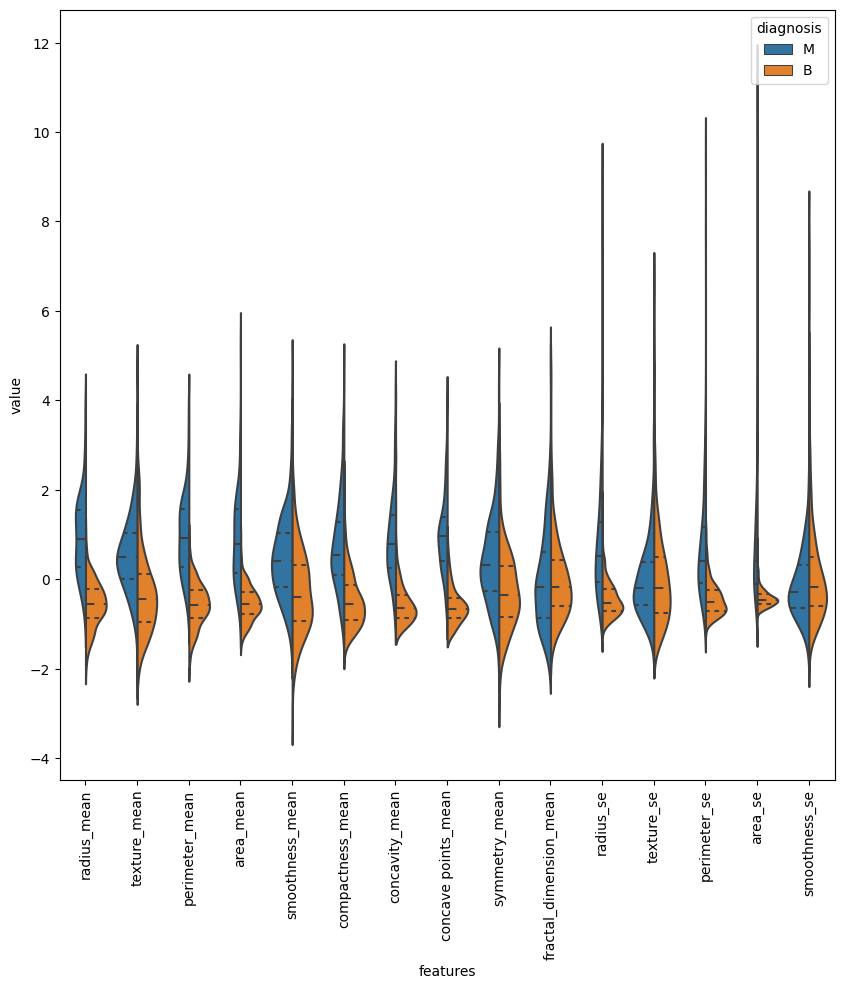

In [14]:
# first fifteen features
data_dia = y
X1 = X
# standardization
X1_n_2 = (X1 - X1.mean()) / (X1.std())              
X1 = pd.concat([y,X1_n_2.iloc[:,0:15]],axis=1)
#  It transforms the DataFrame from wide format to long format, 
#  where each row represents a unique combination of the diagnosis, feature, and corresponding value.
X1 = pd.melt(X1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
# specifing the x-axis as the "features" column, the y-axis as the "value" column, 
# and the hue as the "diagnosis" column. The split=True parameter splits the violin plot for each diagnosis, 
# and inner="quart" configures the inner part of the violin to show quartiles.
sns.violinplot(x="features", y="value", hue="diagnosis", data=X1,split=True, inner="quart")
# Rotateing the x-axis labels by 90 degrees for better readability.
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

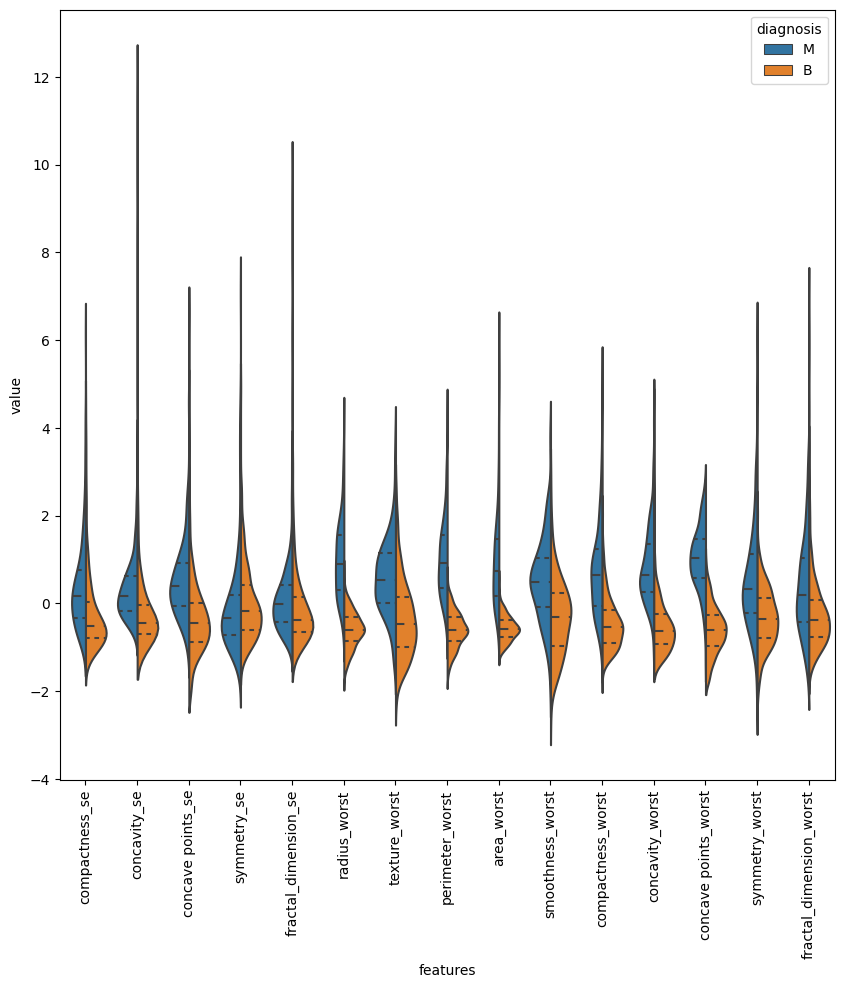

In [15]:
# last fifteen features
data_dia = y
X1 = X
# standardization
X1_n_2 = (X1 - X1.mean()) / (X1.std())              
X1 = pd.concat([y,X1_n_2.iloc[:,15:31]],axis=1)
X1 = pd.melt(X1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=X1,split=True, inner="quart")
plt.xticks(rotation=90)


**Using boxplot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

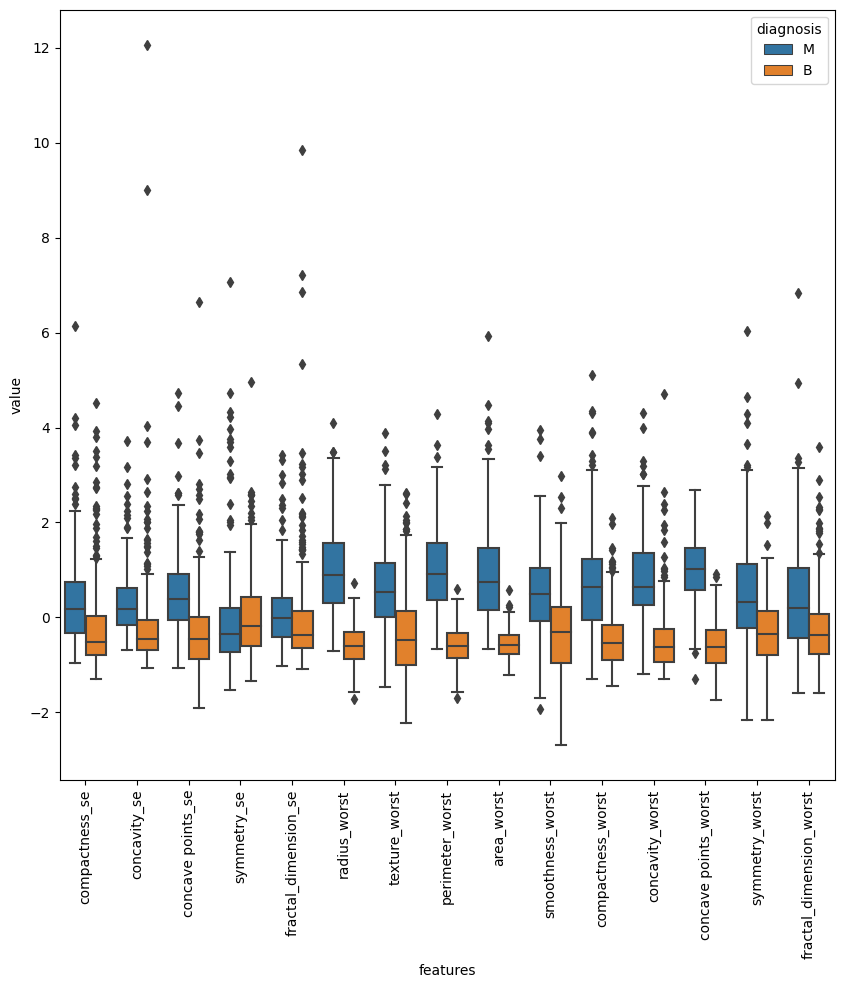

In [16]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=X1)
plt.xticks(rotation=90)

**Using jointplot**

 Combining two different types of plots to visualize the relationship between two variables: a scatter plot and a histogram suing sns.jointplot

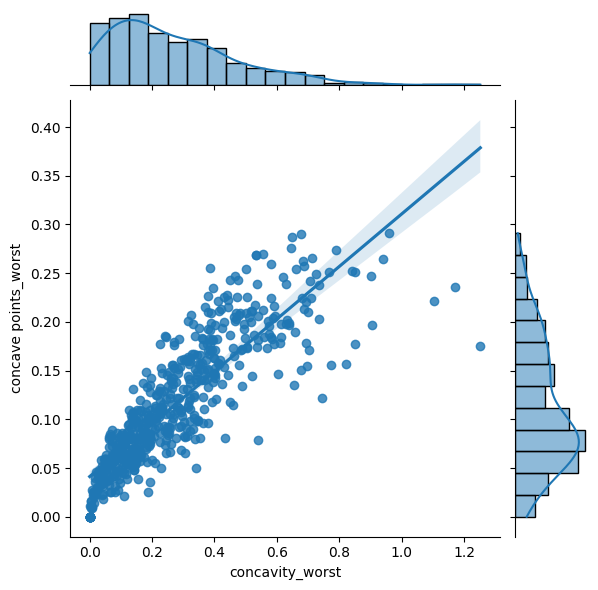

In [18]:
sns.jointplot(data=data, x='concavity_worst', y='concave points_worst', kind="reg")

**Using heatmap**

Generating a heatmap where each cell's color represents the correlation between two variables in the DataFrame X. The color scale indicates the magnitude of the correlation, with different colors representing different ranges of values.

<Axes: >

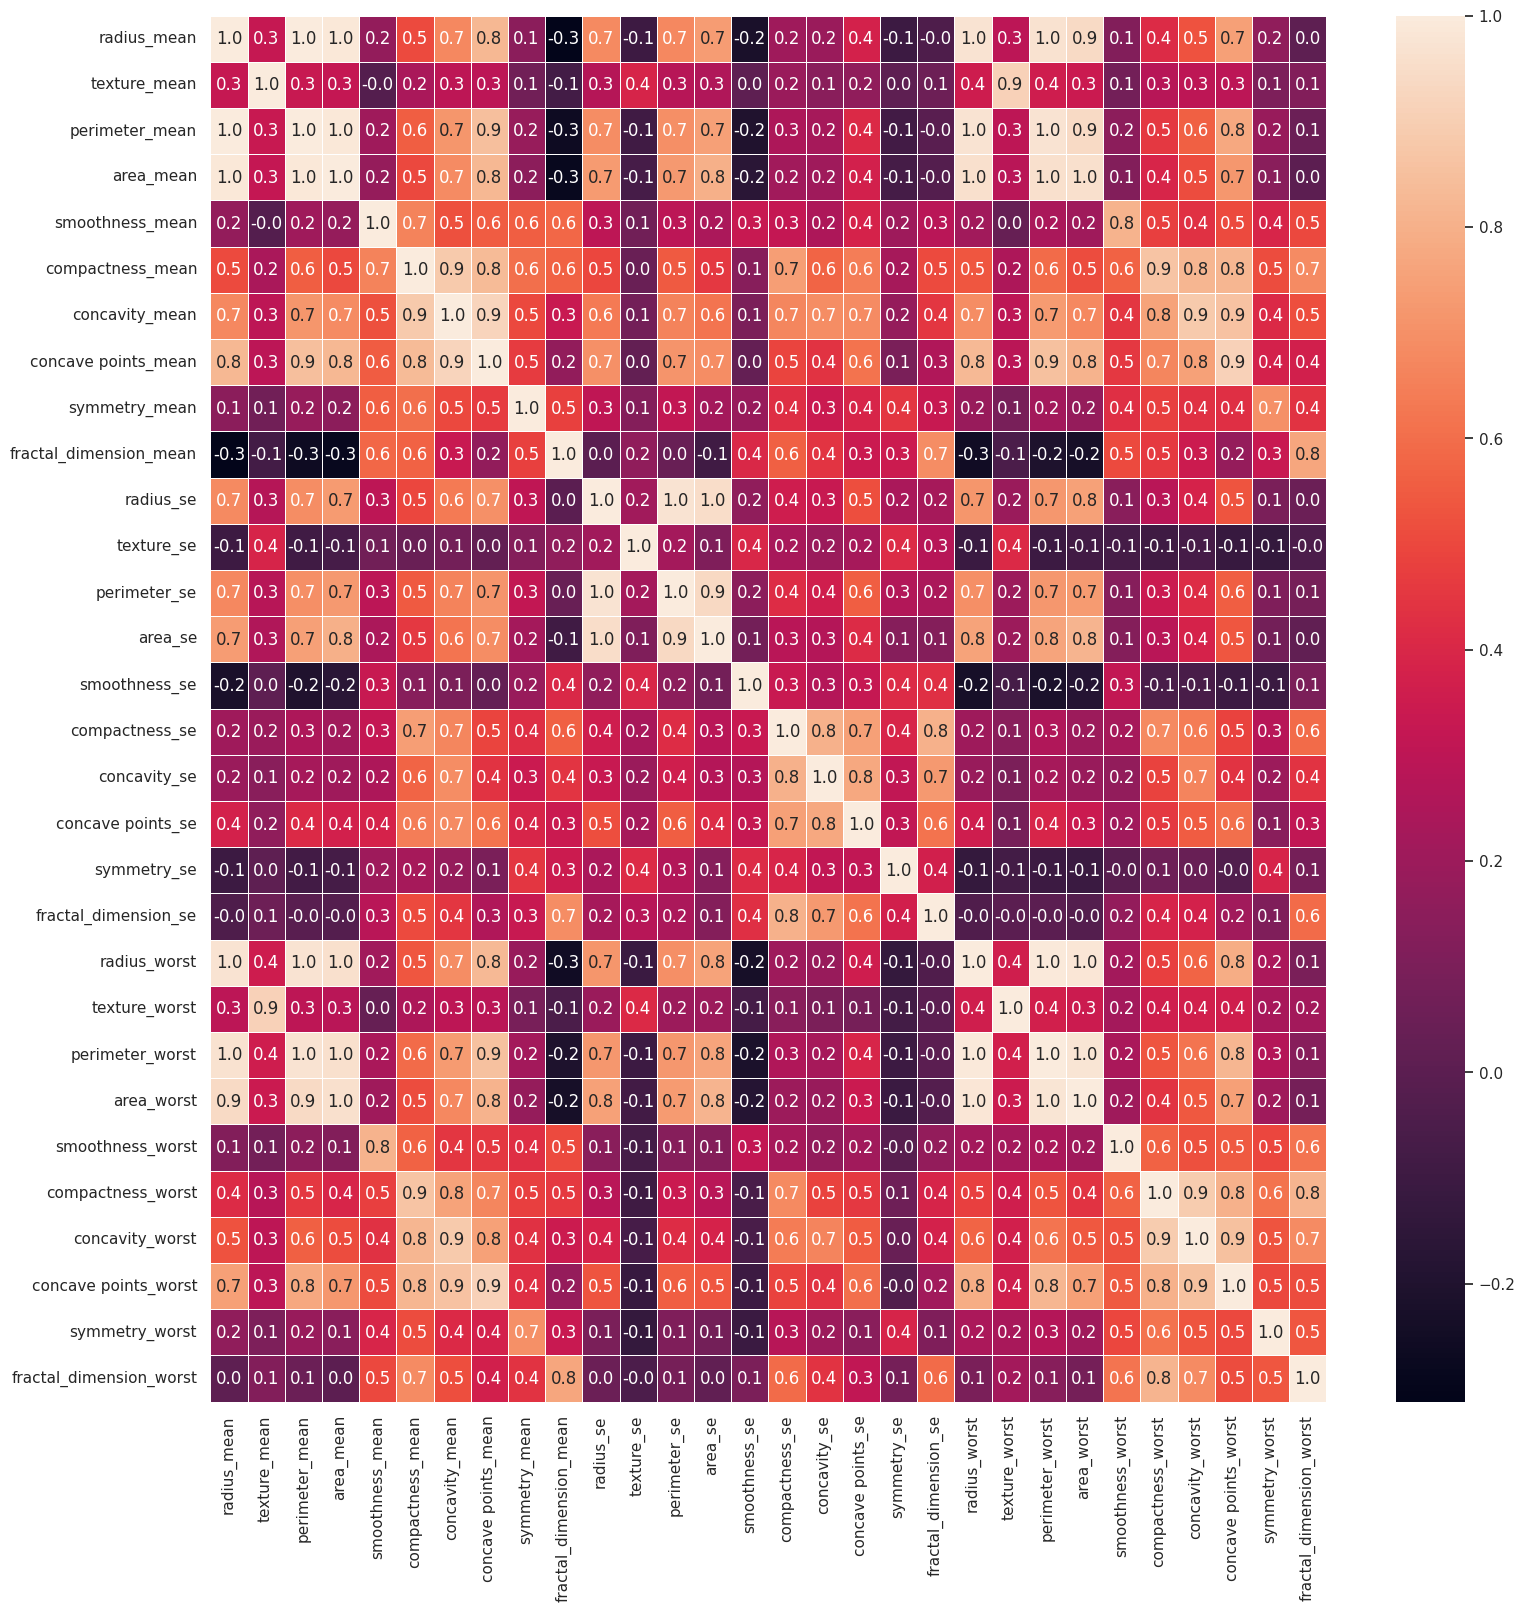

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection

In [19]:
# importing liabraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

** 1. Filter Method: Correlation Analysis**

In [22]:
correlation_threshold = 0.5  # Set a correlation threshold as per your preference
correlated_features = set()
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

In [23]:
# Remove correlated features
X_train_filtered = X_train.drop(correlated_features, axis=1)
X_test_filtered = X_test.drop(correlated_features, axis=1)

<Axes: >

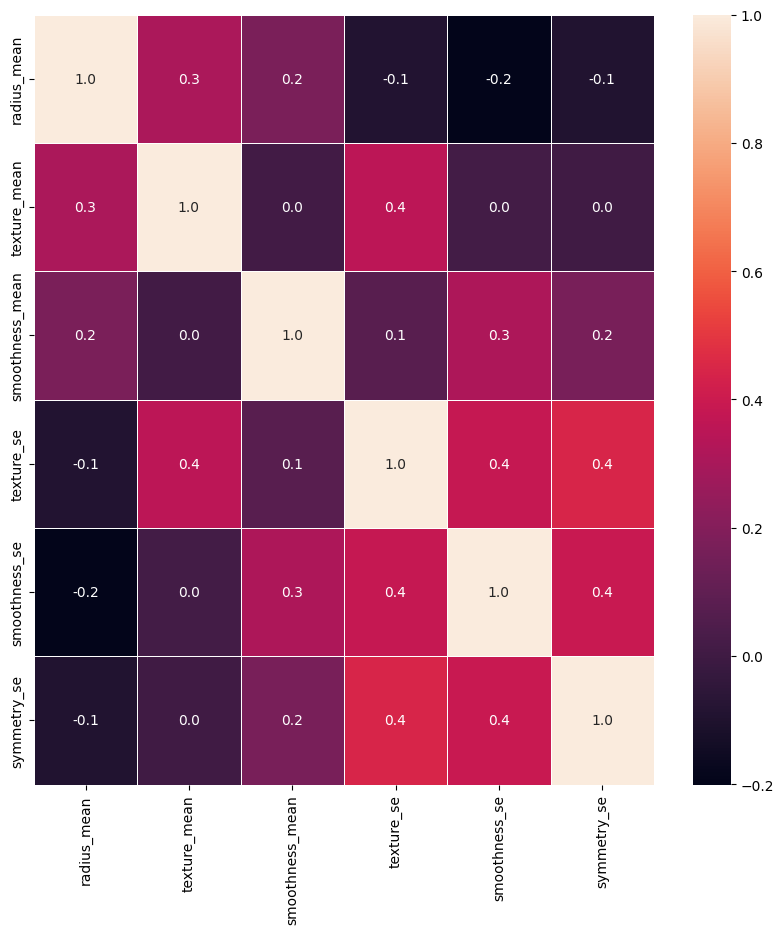

In [24]:
#correlation map after removing correlated features for training data
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_train_filtered.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<Axes: >

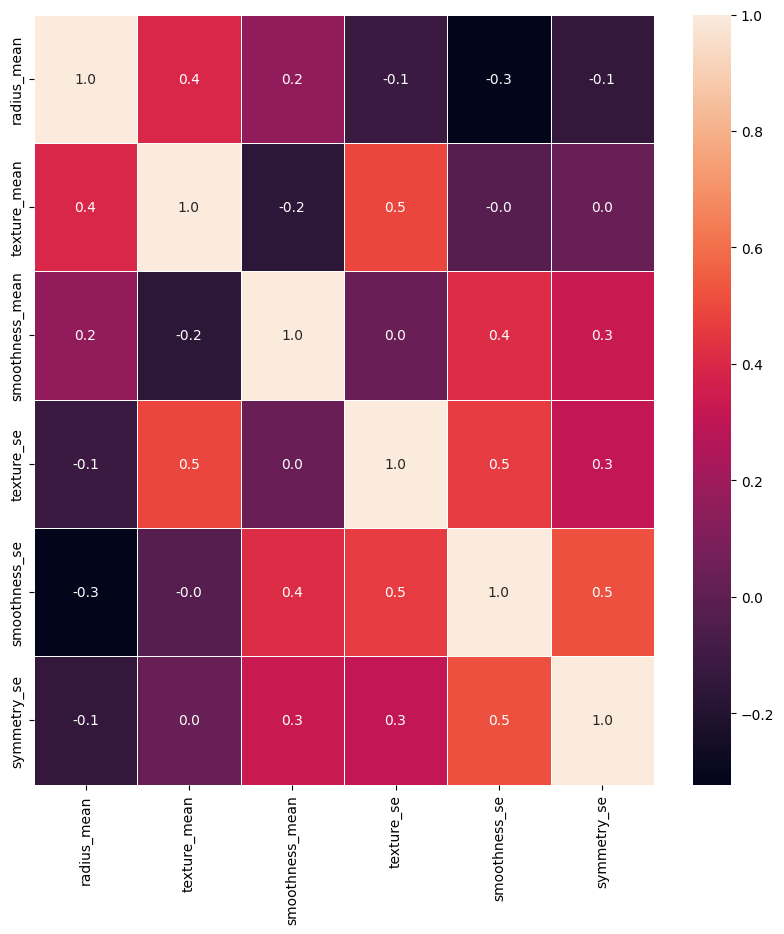

In [25]:
#correlation map after removing correlated features for testing data
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_test_filtered.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**2. Wrapper Method: Recursive Feature Elimination (RFE) with Random Fores**

In [27]:

rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_filtered, y_train)
X_test_rfe = rfe.transform(X_test_filtered)

** 3. Embedded Method: L1 Regularization (Lasso)**

In [28]:
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_rfe, y_train)
model = SelectFromModel(logreg, prefit=True)
X_train_lasso = model.transform(X_train_rfe)
X_test_lasso = model.transform(X_test_rfe)

# Applying algorithms

**Using SVM**

In [30]:
# Example using SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_lasso, y_train)
y_pred = svm_classifier.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
recall = recall_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
f1 = f1_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8947368421052632
Precision: 0.8974358974358975
Recall: 0.813953488372093
F1-Score: 0.8536585365853658


**Using Logistic Regression**

In [31]:
# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M') 
recall = recall_score(y_test, y_pred, pos_label='M')  
f1 = f1_score(y_test, y_pred, pos_label='M')  

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.8947368421052632
Precision: 0.8974358974358975
Recall: 0.813953488372093
F1-Score: 0.8536585365853658


**Using Gradient Boosting**



In [32]:
from sklearn.ensemble import GradientBoostingClassifier
# Create and train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
recall = recall_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
f1 = f1_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9210526315789473
Precision: 0.8863636363636364
Recall: 0.9069767441860465
F1-Score: 0.896551724137931


**Using K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
recall = recall_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
f1 = f1_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9035087719298246
Precision: 0.8809523809523809
Recall: 0.8604651162790697
F1-Score: 0.8705882352941177


**Using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
recall = recall_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
f1 = f1_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8947368421052632
Precision: 0.8974358974358975
Recall: 0.813953488372093
F1-Score: 0.8536585365853658


**Using Random Forest**

In [ ]:
# Create and train the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
recall = recall_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'
f1 = f1_score(y_test, y_pred, pos_label='M')  # Set the positive label as 'M'

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9210526315789473
Precision: 0.8695652173913043
Recall: 0.9302325581395349
F1-Score: 0.898876404494382


# Comparing results

**Printing results in tabular form**

In [33]:
import pandas as pd
from tabulate import tabulate

# Define the results as a dictionary
results = {
    'Algorithm': ['SVM', 'Logistic Regression', 'Gradient Descent', 'KNN', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [0.8947, 0.8947, 0.9211, 0.9035, 0.8947, 0.9211],
    'Precision': [0.8974, 0.8974, 0.8864, 0.8810, 0.8974, 0.8696],
    'Recall': [0.8140, 0.8140, 0.9070, 0.8605, 0.8140, 0.9302],
    'F1-Score': [0.8537, 0.8537, 0.8966, 0.8706, 0.8537, 0.8989]
}

# Create a DataFrame from the results dictionary
df = pd.DataFrame(results)

# Format the table using Tabulate
table = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the table
print(table)


| Algorithm           |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|-----------:|------------:|---------:|-----------:|
| SVM                 |     0.8947 |      0.8974 |   0.814  |     0.8537 |
| Logistic Regression |     0.8947 |      0.8974 |   0.814  |     0.8537 |
| Gradient Descent    |     0.9211 |      0.8864 |   0.907  |     0.8966 |
| KNN                 |     0.9035 |      0.881  |   0.8605 |     0.8706 |
| Naive Bayes         |     0.8947 |      0.8974 |   0.814  |     0.8537 |
| Random Forest       |     0.9211 |      0.8696 |   0.9302 |     0.8989 |


**Visualizing the comparison**

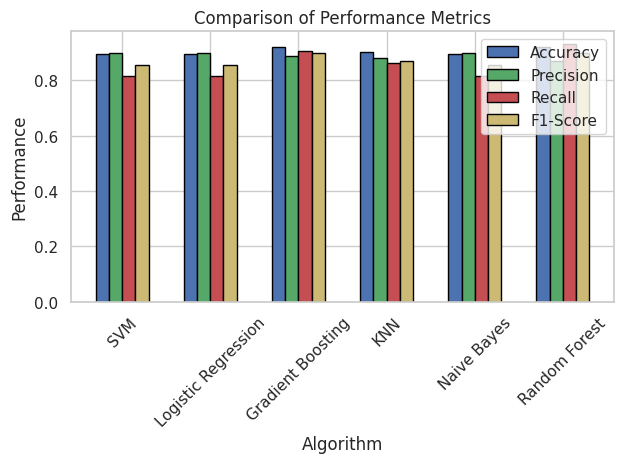

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar plot
algorithms = ['SVM', 'Logistic Regression', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Random Forest']
accuracy = [0.8947, 0.8947, 0.9211, 0.9035, 0.8947, 0.9211]
precision = [0.8974, 0.8974, 0.8864, 0.881, 0.8974, 0.8696]
recall = [0.814, 0.814, 0.907, 0.8605, 0.814, 0.9302]
f1_score = [0.8537, 0.8537, 0.8966, 0.8706, 0.8537, 0.8989]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]
r4 = [x + 3 * bar_width for x in r1]

# Create the bar plot
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='black', label='F1-Score')

# Customize the plot
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Comparison of Performance Metrics')
plt.xticks([r + 1.5 * bar_width for r in range(len(algorithms))], algorithms, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Fine Tunning the SVM, Random Forest and Gradeint Descent, Logistic Regression and Naive Bayes

**Fine tunning the SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale']
}

# Create an SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameter configuration
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create an SVM model with the best hyperparameters
best_svm = SVC(**best_params)

# Train the model on the full training set
best_svm.fit(X_train_lasso, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 0.9035087719298246
Precision: 0.8809523809523809
Recall: 0.8604651162790697
F1-Score: 0.8705882352941177


**Fine tunning the Gradient Boosting**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Gradient Boosting classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(**best_params)

# Fit the model with the best parameters on the training data
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gb_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1_scr = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_scr)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-Score: 0.9411764705882352


**Fine tunning the Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the model with the best parameters on the training data
best_rf_classifier.fit(X_train_lasso, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1_scr = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_scr)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9122807017543859
Precision: 0.8666666666666667
Recall: 0.9069767441860465
F1-Score: 0.8863636363636364


**Fine tunning the KNN** **bold text**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Fit the model with the best parameters on the training data
best_knn_classifier.fit(X_train_lasso, y_train)

# Make predictions on the test data
y_pred = best_knn_classifier.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9210526315789473
Precision: 0.8863636363636364
Recall: 0.9069767441860465
F1-Score: 0.896551724137931


**Fine tunning the Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Logistic Regression classifier with the best parameters
best_logistic_classifier = LogisticRegression(**best_params)

# Fit the model with the best parameters on the training data
best_logistic_classifier.fit(X_train_lasso, y_train)

# Make predictions on the test data
y_pred = best_logistic_classifier.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8947368421052632
Precision: 0.8974358974358975
Recall: 0.813953488372093
F1-Score: 0.8536585365853658


**Fine tunning the Naive Bayes** 

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter grid
param_grid = {
    'priors': [None, [0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_lasso, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Gaussian Naive Bayes classifier with the best parameters
best_nb_classifier = GaussianNB(**best_params)

# Fit the model with the best parameters on the training data
best_nb_classifier.fit(X_train_lasso, y_train)

# Make predictions on the test data
y_pred = best_nb_classifier.predict(X_test_lasso)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best Hyperparameters: {'priors': [0.7, 0.3]}
Accuracy: 0.9122807017543859
Precision: 0.9459459459459459
Recall: 0.813953488372093
F1-Score: 0.875


**Comparing results after fine tunning**

In [40]:
import pandas as pd
from tabulate import tabulate

# Create the result dictionary
results = {
    'Algorithm': ['SVM', 'Gradient Boosting', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes'],
    'Best Hyperparameters': [{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'},
                             {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300},
                             {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100},
                             {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'},
                             {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'},
                             {'priors': [0.7, 0.3]}],
    'Accuracy': [0.9035, 0.9561, 0.9123, 0.9211, 0.8947, 0.9123],
    'Precision': [0.8809, 0.9524, 0.8667, 0.8864, 0.8974, 0.9459],
    'Recall': [0.8605, 0.9302, 0.9070, 0.9069, 0.8140, 0.8139],
    'F1-Score': [0.8706, 0.9412, 0.8864, 0.8966, 0.8537, 0.8750]
}

# Create a DataFrame from the result dictionary
df_results = pd.DataFrame(results)

# Convert the DataFrame to a table using tabulate
result_table = tabulate(df_results, headers='keys', tablefmt='pipe', showindex=False)

# Print the result table
print(result_table)


| Algorithm           | Best Hyperparameters                                                                                             |   Accuracy |   Precision |   Recall |   F1-Score |
|:--------------------|:-----------------------------------------------------------------------------------------------------------------|-----------:|------------:|---------:|-----------:|
| SVM                 | {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}                                                                       |     0.9035 |      0.8809 |   0.8605 |     0.8706 |
| Gradient Boosting   | {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}                                                     |     0.9561 |      0.9524 |   0.9302 |     0.9412 |
| Random Forest       | {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100} |     0.9123 |      0.8667 |   0.907  |     0.8864 |
| KNN                 | {'metric': 'manhattan', 'n

**Visualizing the comparison after fine tuning**

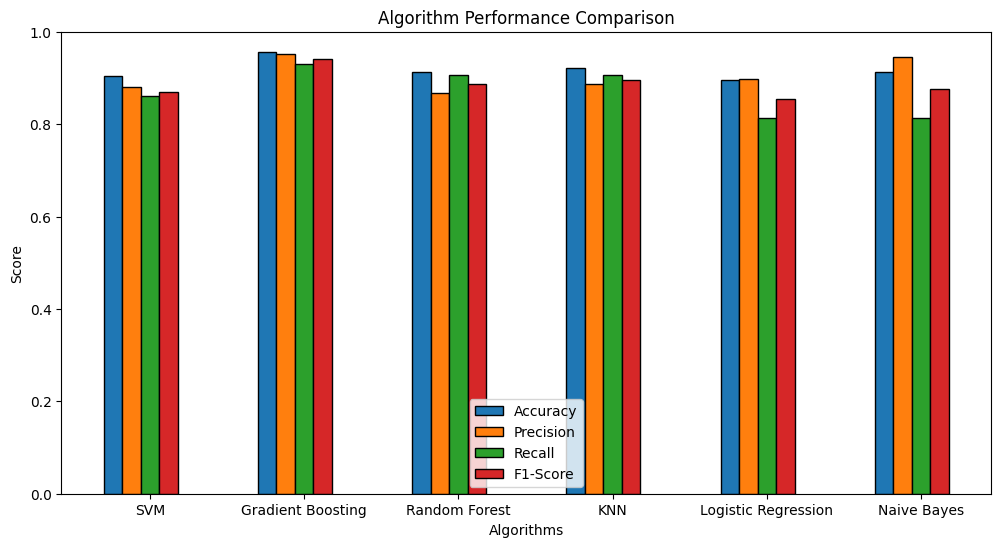

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the algorithms and metrics
algorithms = ['SVM', 'Gradient Boosting', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define the metric values for each algorithm
svm_metrics = [0.9035087719298246, 0.8809523809523809, 0.8604651162790697, 0.8705882352941177]
gb_metrics = [0.956140350877193, 0.9523809523809523, 0.9302325581395349, 0.9411764705882352]
rf_metrics = [0.9122807017543859, 0.8666666666666667, 0.9069767441860465, 0.8863636363636364]
knn_metrics = [0.9210526315789473, 0.8863636363636364, 0.9069767441860465, 0.896551724137931]
lr_metrics = [0.8947368421052632, 0.8974358974358975, 0.813953488372093, 0.8536585365853658]
nb_metrics = [0.9122807017543859, 0.9459459459459459, 0.813953488372093, 0.875]

# Set the width of each bar
bar_width = 0.12
# Set the positions of the bars on the x-axis
r = np.arange(len(algorithms))

# Plotting the bar plots
plt.figure(figsize=(12, 6))
for i in range(len(metrics)):
    plt.bar(r + i * bar_width, [svm_metrics[i], gb_metrics[i], rf_metrics[i], knn_metrics[i], lr_metrics[i], nb_metrics[i]],
            width=bar_width, edgecolor='black', label=metrics[i])

# Add xticks and labels
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Algorithm Performance Comparison')
plt.xticks(r + (len(metrics) * bar_width) / 2, algorithms)
plt.legend()

plt.ylim(0, 1)  # Set the y-axis limits to be between 0 and 1

plt.show()



**Final Comment**

Looking at the bar plot comparing the performance metrics of different algorithms, we can make several observations:

1. Accuracy: Gradient Boosting (0.956) performs the best, followed closely by KNN (0.921) and Random Forest (0.912). SVM (0.904), Naive Bayes (0.912), and Logistic Regression (0.895) show slightly lower accuracy scores.

2. Precision: Naive Bayes (0.946) achieves the highest precision, followed by Gradient Boosting (0.952) and Logistic Regression (0.897). Random Forest (0.867), KNN (0.886), and SVM (0.881) exhibit slightly lower precision scores.

3. Recall: Gradient Boosting (0.930) demonstrates the highest recall, followed by Random Forest (0.907) and KNN (0.907). Naive Bayes (0.814), Logistic Regression (0.814), and SVM (0.860) have relatively lower recall scores.

4. F1-Score: Gradient Boosting (0.941) obtains the highest F1-Score, followed by KNN (0.897) and Random Forest (0.886). Naive Bayes (0.875), SVM (0.871), and Logistic Regression (0.854) achieve slightly lower F1-Scores.

Based on these observations, it appears that Gradient Boosting consistently performs well across multiple metrics, indicating its overall effectiveness for this particular problem. However, it is important to consider other factors such as computational resources, interpretability, and specific requirements of the problem when selecting the most appropriate algorithm.